[], Categories (4, object): [0.0 < 'Sí' < 'No' < 'Ns./Nr.']
[], Categories (4, object): [0.0 < 'Sí' < 'No' < 'Ns./Nr.']


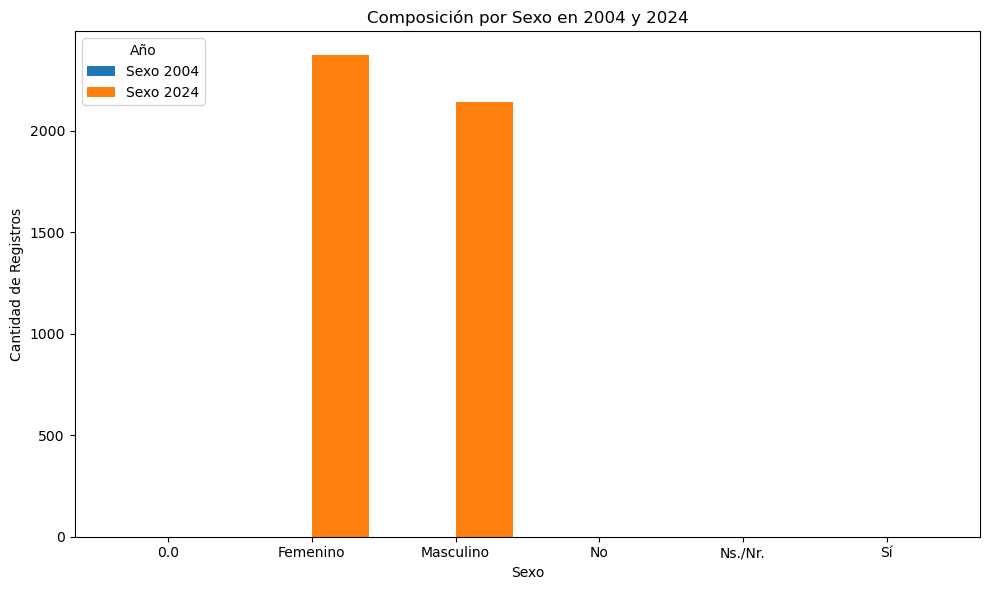

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de 2004 y 2024
base_2004 = pd.read_stata("C:/Users/roman/Downloads/usu_individual_T104.dta")
base_2024 = pd.read_excel("C:/Users/roman/Downloads/EPH_usu_1er_Trim_2024_xlsx/usu_individual_T124.xlsx")

# Filtrar por la región 42
base_2004 = base_2004[base_2004['region'] == 42]
base_2024 = base_2024[base_2024["REGION"] == 42]

# Renombrar columnas en 2004 para que coincidan con las de 2024
renombrar_columnas_2004 = {
    'CH03': 'CH03',
    'v2': 'CH04',
    'v3': 'CH06',
    'v4': 'CH07',
    'v21': 'ESTADO',
    'v22': 'CAT_OCUP',
    'v5': 'PP3E_TOT',
    'v6': 'P21',
    'v7': 'PP07H',
    'v8': 'NIVEL_ED',
    'v9': 'PP04B_COD',
    'v10': 'PP04D_COD',
    'v11': 'CH08',
    'v12': 'PP07G2',
    'v13': 'PP07G3',
}
base_2004.rename(columns=renombrar_columnas_2004, inplace=True)

# Filtrar solo los ocupados (ESTADO == 1)
base_2004_ocupados = base_2004[base_2004['ESTADO'] == 1]
base_2024_ocupados = base_2024[base_2024['ESTADO'] == 1]

# Agregar columna 'año'
base_2004["año"] = 2004
base_2024["año"] = 2024

# Comprobar los valores únicos en 'CH04' para asegurar que el sexo está bien codificado
print(base_2004['CH04'].unique())  # Verificar los valores únicos en 'CH04' de 2004

# Si los valores están numéricamente codificados, reemplazarlos
base_2004['CH04'] = base_2004['CH04'].replace({1: 'Masculino', 2: 'Femenino'})
base_2024['CH04'] = base_2024['CH04'].replace({1: 'Masculino', 2: 'Femenino'})

# Verificar los valores después del reemplazo
print(base_2004['CH04'].unique())

# Contar la cantidad de registros para cada sexo en 2004 y 2024
sexo_2004 = base_2004['CH04'].value_counts()
sexo_2024 = base_2024['CH04'].value_counts()

# Convertir a un DataFrame para graficar
df_sexo = pd.DataFrame({
    'Sexo 2004': sexo_2004,
    'Sexo 2024': sexo_2024
}).fillna(0)  # Para manejar cualquier valor nulo si no hay registros en 2024 o 2004

# Graficar la composición por sexo
df_sexo.plot(kind='bar', figsize=(10,6), width=0.8)

# Agregar etiquetas y título
plt.title('Composición por Sexo en 2004 y 2024')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=0)
plt.legend(title='Año', loc='upper left')

# Mostrar gráfico
plt.tight_layout()
plt.show()
